In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
flow_file = './PrecipModel/01399500flow.txt'
flow_file_clean = flow_file[:-4] + '_cleaned.txt'

In [3]:
# f = open(flow_file, "r")
# out = open(flow_file_clean, 'w')
# for line in f:
#     if (line[0] == 'U') or (line[0] == 'a'):
#         out.write(line)

In [4]:
# flow = pd.read_csv(flow_file_clean, infer_datetime_format=True, parse_dates=['datetime'], sep='\t') # header='infer') engine='python', 
# flow

In [5]:
# flow['day'] = ''
# flow['day'] = pd.to_datetime(flow['datetime']).dt.date
# flow['dailymax'] = ''
# for iter_day in flow.day.unique():
#     flow.dailymax[flow.day == iter_day] = flow['194653_00060'].loc[flow.day == iter_day].max()
# flow = flow.drop_duplicates(subset='day')
# flow.to_csv(flow_file_clean[:-4] + 'daily.csv',index='False')
flow = pd.read_csv(flow_file_clean[:-4] + 'daily.csv', infer_datetime_format=True, parse_dates=['datetime'])
flow

,agency_cd,site_no,datetime,tz_cd,194653_00060,194653_00060_cd,194654_00065,194654_00065_cd,day,dailymax
0,USGS,1399500,2010-07-01,EDT,18.7,A,1.61,A,2010-07-01,20.3
1,USGS,1399500,2010-07-02,EDT,18.7,A,1.61,A,2010-07-02,20.3
2,USGS,1399500,2010-07-03,EDT,19.5,A,1.62,A,2010-07-03,20.3
3,USGS,1399500,2010-07-04,EDT,18.7,A,1.61,A,2010-07-04,18.7
4,USGS,1399500,2010-07-05,EDT,17.2,A,1.59,A,2010-07-05,17.2
...,...,...,...,...,...,...,...,...,...,...
3958,USGS,1399500,2021-07-03,EDT,28.2,P,1.72,P,2021-07-03,32.4
3959,USGS,1399500,2021-07-04,EDT,31.3,P,1.75,P,2021-07-04,31.3
3960,USGS,1399500,2021-07-05,EDT,24.3,P,1.68,P,2021-07-05,24.3
3961,USGS,1399500,2021-07-06,EDT,21.6,P,1.65,P,2021-07-06,29.2


In [6]:
flow.dtypes

agency_cd                  object
site_no                     int64
datetime           datetime64[ns]
tz_cd                      object
194653_00060              float64
194653_00060_cd            object
194654_00065              float64
194654_00065_cd            object
day                        object
dailymax                  float64
dtype: object

In [7]:
gage_info = pd.read_csv('./PrecipModel/USGSGagesNJ_HUC.csv')
gage_info

,OID_,Field1,EVENTDATE,REACHCODE,REACHSMDAT,REACHRESOL,FEATURECOM,FEATURECLA,SOURCE_ORI,SOURCE_DAT,...,FEATUREDET,Measure,Offset,EventType,FLComID,POINT_X,POINT_Y,POINT_Z,POINT_M,RASTERVALU
0,1,1369,2014-12-04 00:00:00,2.060000e+12,NaN,Medium,0,0,"USGS, Water Resources Division",NaN,...,http://waterdata.usgs.gov/nwis/nwisman/?site_n...,30.84248,0,StreamGage,4766870,-76.072273,39.040168,0,30.84248,NaN
1,2,1452,2014-12-04 00:00:00,2.060000e+12,NaN,Medium,0,0,"USGS, Water Resources Division",NaN,...,http://waterdata.usgs.gov/nwis/nwisman/?site_n...,32.89288,0,StreamGage,4766680,-76.055163,39.054286,0,32.89288,NaN
2,3,1500,2014-12-04 00:00:00,2.060000e+12,NaN,Medium,0,0,"USGS, Water Resources Division",NaN,...,http://waterdata.usgs.gov/nwis/nwisman/?site_n...,37.50628,0,StreamGage,4768920,-76.109346,38.964475,0,37.50628,NaN
3,4,1403,2014-12-04 00:00:00,2.060010e+12,NaN,Medium,0,0,"USGS, Water Resources Division",NaN,...,http://waterdata.usgs.gov/nwis/nwisman/?site_n...,76.56757,0,StreamGage,9407582,-75.942725,38.966743,0,76.56757,NaN
4,5,1392,2014-12-04 00:00:00,2.060010e+12,NaN,Medium,0,0,"USGS, Water Resources Division",NaN,...,http://waterdata.usgs.gov/nwis/nwisman/?site_n...,4.25223,0,StreamGage,9407484,-75.785372,38.997196,0,4.25223,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,1138,2937,2014-12-04 00:00:00,2.020010e+12,NaN,Medium,0,0,"USGS, Water Resources Division",NaN,...,http://waterdata.usgs.gov/nwis/nwisman/?site_n...,21.39716,0,StreamGage,6188198,-73.982208,42.488184,0,21.39716,NaN
1138,1139,2747,2014-12-04 00:00:00,2.020010e+12,NaN,Medium,0,0,"USGS, Water Resources Division",NaN,...,http://waterdata.usgs.gov/nwis/nwisman/?site_n...,61.37064,0,StreamGage,6188216,-73.810065,42.439672,0,61.37064,NaN
1139,1140,3018,2014-12-04 00:00:00,2.020010e+12,NaN,Medium,0,0,"USGS, Water Resources Division",NaN,...,http://waterdata.usgs.gov/nwis/nwisman/?site_n...,11.13148,0,StreamGage,6188948,-73.743618,42.329592,0,11.13148,NaN
1140,1141,3035,2014-12-04 00:00:00,2.020010e+12,NaN,Medium,0,0,"USGS, Water Resources Division",NaN,...,http://waterdata.usgs.gov/nwis/nwisman/?site_n...,11.34027,0,StreamGage,6188346,-73.575638,42.352435,0,11.34027,NaN


In [8]:
flow.site_no[0]

1399500

In [9]:
gage_x = gage_info.POINT_X.loc[gage_info.SOURCE_FEA == flow.site_no[0]].values[0]
gage_y = gage_info.POINT_Y.loc[gage_info.SOURCE_FEA == flow.site_no[0]].values[0]
print(f'X = {gage_x}, Y = {gage_y}')

X = -74.73011044, Y = 40.72795907


In [10]:
#Read in precipitation data
pcp1 = pd.read_csv('./PrecipModel/US1NJHN0021.csv', infer_datetime_format=True, parse_dates=['DATE'])
pcp2 = pd.read_csv('./PrecipModel/US1NJSM0011.csv', infer_datetime_format=True, parse_dates=['DATE'])
pcp3 = pd.read_csv('./PrecipModel/US1NJSM0066.csv', infer_datetime_format=True, parse_dates=['DATE'])
# pcp3 = pd.read_csv('./PrecipModel/USC00287301.csv', infer_datetime_format=True, parse_dates=['DATE'])

In [26]:
pcp3

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,WESF,WESF_ATTRIBUTES
0,US1NJSM0066,2016-05-26,40.67335,-74.623583,82.3,"FAR HILLS 1.2 S, NJ US",0.0,",,N",0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1NJSM0066,2016-05-27,40.67335,-74.623583,82.3,"FAR HILLS 1.2 S, NJ US",5.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1NJSM0066,2016-05-28,40.67335,-74.623583,82.3,"FAR HILLS 1.2 S, NJ US",0.0,",,N",0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1NJSM0066,2016-05-29,40.67335,-74.623583,82.3,"FAR HILLS 1.2 S, NJ US",0.0,",,N",0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1NJSM0066,2016-05-30,40.67335,-74.623583,82.3,"FAR HILLS 1.2 S, NJ US",107.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,US1NJSM0066,2021-06-28,40.67335,-74.623583,82.3,"FAR HILLS 1.2 S, NJ US",0.0,",,N",0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1611,US1NJSM0066,2021-06-29,40.67335,-74.623583,82.3,"FAR HILLS 1.2 S, NJ US",0.0,",,N",0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1612,US1NJSM0066,2021-06-30,40.67335,-74.623583,82.3,"FAR HILLS 1.2 S, NJ US",0.0,",,N",0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1613,US1NJSM0066,2021-07-01,40.67335,-74.623583,82.3,"FAR HILLS 1.2 S, NJ US",23.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
print(f'FLOW: {flow.datetime.min()} to {flow.datetime.max()}')
print(f'PCP1: {pcp1.DATE.min()} to {pcp1.DATE.max()}')
print(f'PCP2: {pcp2.DATE.min()} to {pcp2.DATE.max()}')
print(f'PCP3: {pcp3.DATE.min()} to {pcp3.DATE.max()}')

FLOW: 2010-07-01 00:00:00 to 2021-07-07 00:00:00
PCP1: 2009-09-22 00:00:00 to 2021-07-05 00:00:00
PCP2: 2009-04-20 00:00:00 to 2021-07-05 00:00:00
PCP3: 2016-05-26 00:00:00 to 2021-07-02 00:00:00


Text(0.5, 0, 'Time')

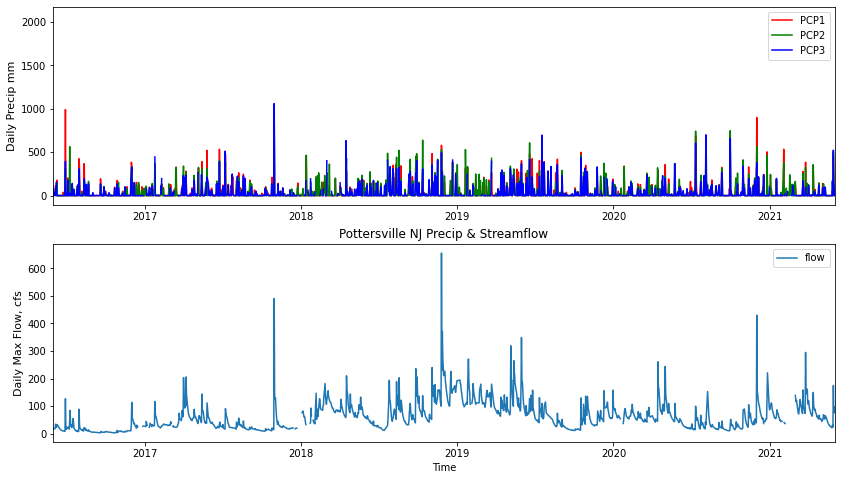

In [22]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(14,8))

# fig1 = plt.figure(figsize=(20, 10))
# ax1 = fig1.add_subplot(111)
# ax1.plot(pcp1['DATE'], pcp1['PRCP'], label='PCP1')
xlim1='2016-06-01' # '2010-08-01'
xlim2='2021-06-01'
plt.title('Pottersville NJ Precip & Streamflow')

ax[0].plot(pcp1['DATE'], pcp1['PRCP'], label='PCP1', c='r')
ax[0].plot(pcp2['DATE'], pcp2['PRCP'], label='PCP2', c='g')
ax[0].plot(pcp3['DATE'], pcp3['PRCP'], label='PCP3', c='b')
ax[0].set_xlim(pd.Timestamp(xlim1), pd.Timestamp(xlim2))
ax[0].legend() #['original signal','low pass filtered'], fontsize=12, loc='upper left',bbox_to_anchor=(0.02,1.4)
ax[0].set_ylabel('Daily Precip mm', fontsize=11)

ax[1].plot(flow['datetime'], flow['194653_00060'], label='flow')
ax[1].set_xlim(pd.Timestamp(xlim1), pd.Timestamp(xlim2))
ax[1].legend() 
ax[1].set_ylabel('Daily Max Flow, cfs', fontsize=11)

# ax1.plot(aqua['time'], aqua['chl_oc3'], label='aqua')
plt.xlabel('Time')
# ax1.legend()
# ax1.grid()

In [16]:
merge1 = pcp1[['DATE','PRCP']]
flow = flow.merge(merge1, left_on='datetime', right_on='DATE')
flow = flow.drop(labels={'DATE'},axis='columns')
flow = flow.rename(columns={"PRCP": pcp1.STATION[0],})

merge2 = pcp2[['DATE','PRCP']]
flow = flow.merge(merge2, left_on='datetime', right_on='DATE')
flow = flow.drop(labels={'DATE'},axis='columns')
flow = flow.rename(columns={"PRCP": pcp2.STATION[0],})

merge3 = pcp3[['DATE','PRCP']]
flow = flow.merge(merge3, left_on='datetime', right_on='DATE')
flow = flow.drop(labels={'DATE'},axis='columns')
flow = flow.rename(columns={"PRCP": pcp3.STATION[0],})
flow

,agency_cd,site_no,datetime,tz_cd,194653_00060,194653_00060_cd,194654_00065,194654_00065_cd,day,dailymax,US1NJHN0021,US1NJSM0011,US1NJSM0066
0,USGS,1399500,2016-05-26,EDT,27.2,A,1.71,A,2016-05-26,27.2,0.0,0.0,0.0
1,USGS,1399500,2016-05-27,EDT,26.2,A,1.70,A,2016-05-27,26.2,33.0,0.0,5.0
2,USGS,1399500,2016-05-28,EDT,24.3,A,1.68,A,2016-05-28,24.3,3.0,0.0,0.0
3,USGS,1399500,2016-05-29,EDT,20.8,A,1.64,A,2016-05-29,20.8,0.0,0.0,0.0
4,USGS,1399500,2016-05-30,EDT,20.0,A,1.63,A,2016-05-30,23.4,58.0,109.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,USGS,1399500,2021-06-28,EDT,24.3,P,1.68,P,2021-06-28,24.3,0.0,0.0,0.0
1481,USGS,1399500,2021-06-29,EDT,22.5,P,1.66,P,2021-06-29,22.5,0.0,0.0,0.0
1482,USGS,1399500,2021-06-30,EDT,21.6,P,1.65,P,2021-06-30,22.5,0.0,0.0,0.0
1483,USGS,1399500,2021-07-01,EDT,22.5,P,1.66,P,2021-07-01,26.2,0.0,58.0,23.0


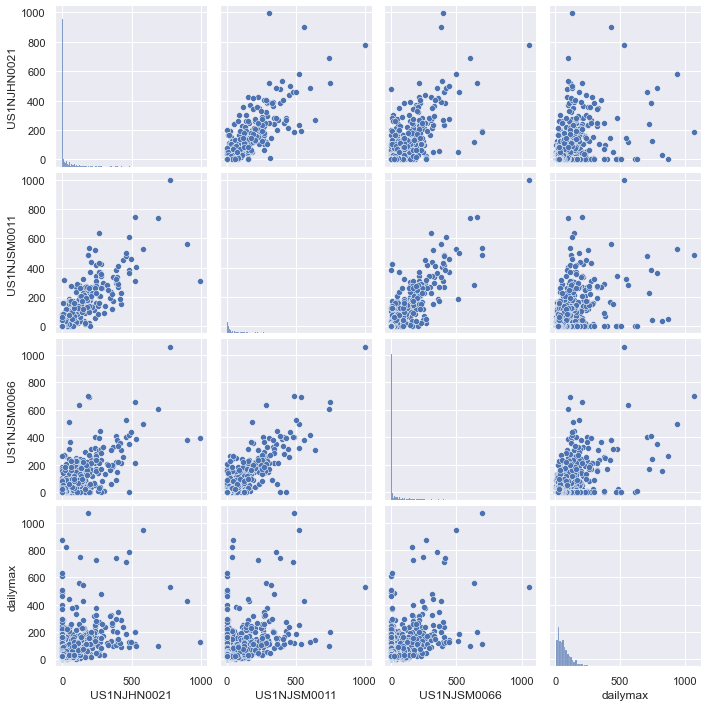

In [27]:
import seaborn as sns
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_theme()
sns_plot = sns.pairplot(flow[['US1NJHN0021', 'US1NJSM0011', 'US1NJSM0066', 'dailymax']])
# sns_plot.savefig("output.png")
sns_plot